1.0


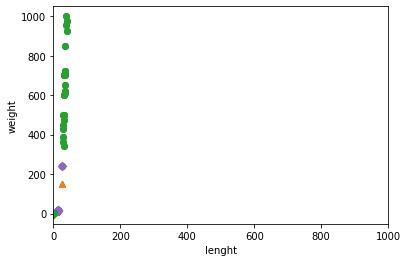

In [2]:
# 35 개 도미 (bream) 데이터
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]
# 14개 빙어(smelt) 데이터
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

fish_length = bream_length + smelt_length
fish_weight = bream_weight + smelt_weight

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

fish_data = np.column_stack((fish_length, fish_weight))
fish_target = np.concatenate((np.ones(35),np.zeros(14)))

# 훈련세트 나눔
# 편향 있음
train_input, test_input, train_target, test_target = train_test_split(fish_data,fish_target,random_state=42)

# 편향제거
train_input, test_input, train_target, test_target = train_test_split(fish_data,fish_target,stratify=fish_target,random_state=42)

# 수상한 도미 한마리
kn = KNeighborsClassifier()
kn.fit(train_input,train_target)
kn.score(train_input,train_target)
# print(kn.predict([[25,150]])) # 예측 불가?

# 스케일이 다른 그래프 1
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(25,150,marker="^")
plt.xlabel("length")
plt.ylabel("weight")
# plt.show()

# k = 5 knn
distances, indexes = kn.kneighbors([[25,150]])

# 스케일이 다른 그래프 2
# 기준확인 필요
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(25,150,marker="^")
plt.scatter(train_input[indexes,0],train_input[indexes,1],marker='D')
plt.xlim(0,1000)
plt.xlabel("lenght")
plt.ylabel("weight")
# plt.show()

# 표준 점수로 값을 맞춤 (전처리)
mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis= 0)
train_scaled = (train_input - mean) / std

# 전처리 모델 훈련
plt.scatter(train_scaled[:,0], train_scaled[:,0])
plt.scatter(25,150,marker="^")
plt.xlabel("lenght")
plt.ylabel("weight")
# plt.show()

new = ([25,150] - mean) /std

plt.scatter(train_scaled[:,0], train_scaled[:,0])
plt.scatter(new[0],new[1],marker="D")
plt.scatter(25,150,marker="^")
plt.xlabel("lenght")
plt.ylabel("weight")
# plt.show()

# 결과 확인
kn.fit(train_scaled, train_target)
test_scaled = (test_input - mean) / std
score =kn.score(test_scaled, test_target)

print(score) # 1이 나옴

# 그래프 확인

distances, indexes = kn.kneighbors([new])
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(25,150,marker="^")
plt.scatter(train_scaled[indexes,0],train_scaled[indexes,1], marker="D")
plt.xlabel("lenght")
plt.ylabel("weight")
plt.show()
